# Test Splitters

In [1]:
#To prevent Data Snooping Bias it is important to create a testing set early on in the project.

In [2]:
import numpy as np
from zlib import crc32

#Simple random test splitter
#Creates a random Test Set. The Test Set will be ${test_ratio}% of the whole dataset. 
#Drawback: each execution will produce a different test set.
def simple_random_test_splitter(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

#Seed random test splitter.
#Creates a random unique Test Set based on a seed. The Test Set will be ${test_ratio}% of the whole dataset.
#Drawback: if new data is added to the dataset the test set won't be unique.
def seed_random_test_splitter(data, test_ratio, seed):
    #Use a seed in the random generator to split data always on the same indices.
    np.random.seed(seed)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

#Hash randon test splitter
#Creates a random unique Test Set based on the hash of each instance's identifier.
#The Test Set will be ${test_ratio}% of the whole dataset.
#DrawBack: Dataset needs a unique identifier column to work.
#If no unique identifier exists, an index can be used.
#An alternative to using the row index is to build a unique identifier joining two columns.
def test_set_check(identifier, test_ratio):
    #Checks if the hash of the identifier is < than ${test_ratio}%
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


def hash_random_test_splitter(data, test_ratio, id_column):
    ids = data[id_column]
    #Creates a two column array (id, test_set_check: True/False)
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    
    #Values with true will be for the test set and values with false for the trainning set.
    return data.loc[~in_test_set], data.loc[in_test_set]


## Test Splitter Usage

In [3]:
#Load Data
import pandas as pd
import os

housing_path = os.path.join("..","datasets","housing")
csv_path = os.path.join(housing_path,"housing.csv")
housing_df = pd.read_csv(csv_path)

In [4]:
train_df, test_df = simple_random_test_splitter(housing_df, 0.2)

In [5]:
train_df, test_df = seed_random_test_splitter(housing_df, 0.2, 42)

In [6]:
housing_with_index_df = housing_df.reset_index()
train_df, test_df = hash_random_test_splitter(housing_with_index_df, 0.2, "index")

In [7]:
#If we don't want to use the row index as a unique identifier, we can build one with [latitude] and [longitude]
housing_with_id = housing_df
housing_with_id["id"] = abs(housing_df["longitude"] * 1000 + housing_df["latitude"])

train_df, test_df = hash_random_test_splitter(housing_with_id, 0.2, "id")

In [8]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,122202.15
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,122222.16
10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,122222.15
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,122222.15
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,121050.52
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,121170.51
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,121180.57
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,121280.57


### Result

In [9]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,122192.12
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,122212.15
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,122212.15
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,122212.16
...,...,...,...,...,...,...,...,...,...,...,...
20583,-122.00,38.73,31.0,371.0,74.0,208.0,84.0,3.8750,137500.0,INLAND,121961.27
20585,-122.04,38.68,26.0,1113.0,222.0,689.0,234.0,3.0486,83600.0,INLAND,122001.32
20621,-121.47,39.01,37.0,1244.0,247.0,484.0,157.0,2.3661,77500.0,INLAND,121430.99
20623,-121.37,39.03,32.0,1158.0,244.0,598.0,227.0,2.8235,65500.0,INLAND,121330.97


# #Scikit-Learn provided split functions

In [20]:
from sklearn.model_selection import train_test_split

#Random sampling method. Similar to simple_random_test_splitter approach.
#More than one dataset can be included and all of them will be splitted on the same indices.
train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42)

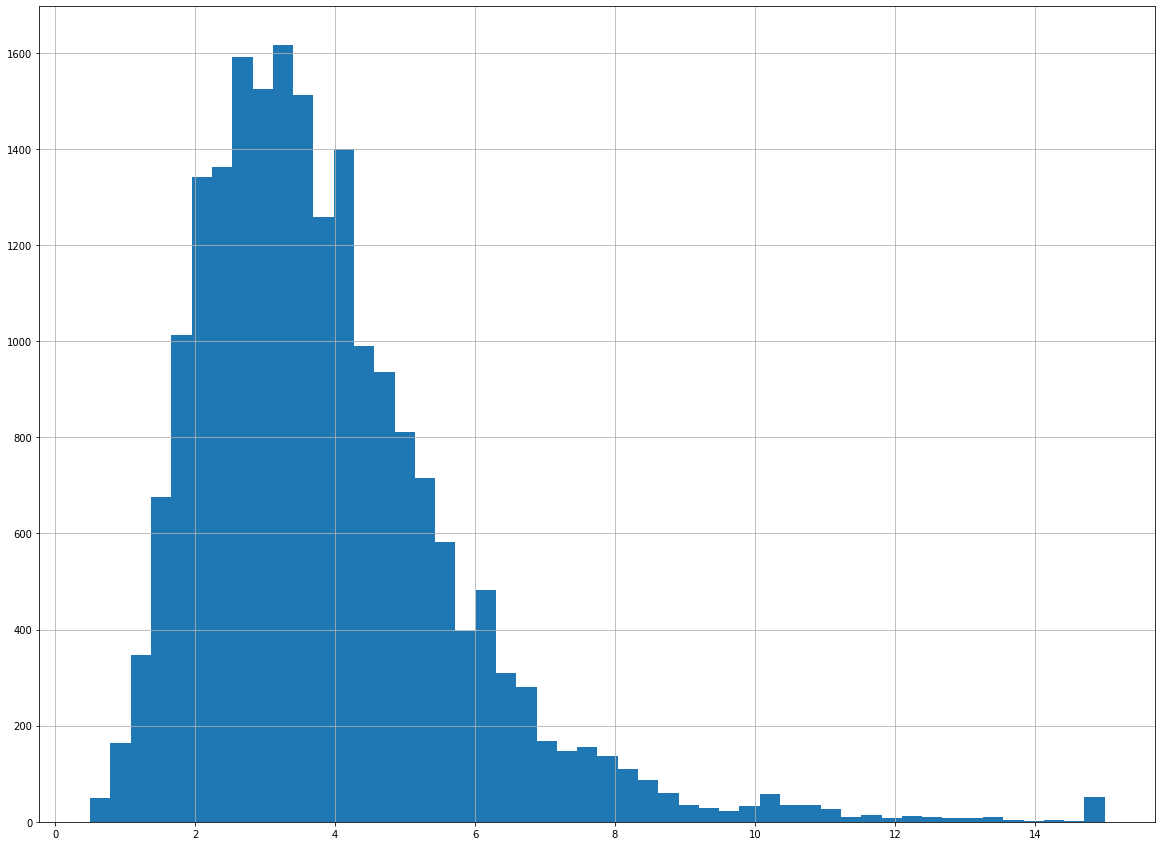

In [28]:
#Stratified sampling method.
#The population is divided homogeneous subgroups (strata). 
#The trainning and testing sets have to have the right proportion of each stratum to be representative 
#of the population.

#Using the housing dataset, given that the median income is a very important attribute to predict 
#median housing price, we will want to ensure that the testing and trainning set are representative of the
#various income categories.
#First we should check how the median income is distributed:
%matplotlib inline
import matplotlib.pyplot as plt

housing_df["median_income"].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#We can see that most of the values lie between 1.5 and 6, and that values extend far on the right 
#compared to the left.

#Now we will want to create a set of categories (stratum) with value ranges to gather the data. 
#It is important have suficient number of instances in each stratum to prevent 
#biasing the importance of each stratum.


### Result

In [21]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,116997.29
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,118126.23
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,120445.34
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,117077.31
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,119763.22
...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN,117926.22
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND,117395.98
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN,118345.97
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN,121922.42


In [22]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,118973.94
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,119424.86
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,122402.20
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,118685.72
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,121893.38
...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN,117186.64
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN,120794.64
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN,122012.69
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND,119723.23
